In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import random
import statsmodels.formula.api as smf

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'serif'

plt.rcParams["font.variant"]='small-caps'

plt.rcParams["font.size"]='15'

flare_cmap=sns.color_palette("flare", as_cmap=False)

##Plotting and Curve Fitting exercise

In this exercise, we will explore plotting types, then perform a curve fitting exercise. 

Curve fitting: We will perform a regression on feature(s) to determine if we can predict an observable trait (oxygen saturation) based on a set of features (including genotype, and a set of environmental variables). 

## Overview of Exercises:
 - Pandas DFs
 - Plotting
  - Pair plot
  - Violin
  - Strip plot
- Regression
  - Curve fit

# Pandas DFs


Pandas: or Python Data Analysis Library, is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

It allows you to import your data as a dataframe, which looks like the columns/rows of a table in excel.


Please do the following in the rows below. Some skeleton code is provided for some of the prompts

1. import the pandas df
2. Print the first 10 lines
3. Print a column of your choice
4. print a row of your choice

In [ ]:
#1
oxygen_df = pd.read_csv('oxygen_levels_in_population.csv', index_col=0)

FileNotFoundError: ignored

In [ ]:
#2
oxygen_df.head()

,O2_saturation,rare_variant,yrs_spent_at_high_alt,yrs_spent_running,sex_assigned_at_birth
name,,,,,
Lori Edwards,80,False,2,6,female
Timothy Johnston,80,False,8,17,male
Margie Cooley,80,False,4,13,female
Alexander Diaz,80,False,8,3,male
Hubert Edwards,80,False,2,15,male


In [ ]:
#3
oxygen_df['O2_saturation']

name
Lori Edwards          80
Timothy Johnston      80
Margie Cooley         80
Alexander Diaz        80
Hubert Edwards        80
                    ... 
Theresa Reed          99
Cynthia Zimmerman    100
Raymond Scott        100
Marc Landry          100
Charles Mann         100
Name: O2_saturation, Length: 100, dtype: int64

In [ ]:
#4
oxygen_df.loc['Raymond Scott']

O2_saturation             100
rare_variant             True
yrs_spent_at_high_alt      11
yrs_spent_running          32
sex_assigned_at_birth    male
Name: Raymond Scott, dtype: object

Question
--
Compare (with a partner next to you) the column you both chose. How do they differ? Do you start to see any patterns (for example, O2 levels vs any of the features) Do you see any trends by eye? Write your answer below:

#Plotting 
Next, we will practice plotting. We will use seaborn to plot our data. 

Matplotlib is a comprehensive plotting library for creating static, animated, and interactive visualizations in Python.

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. It basically makes the matplot lib plots nicer to look at, and easier to code.



http://seaborn.pydata.org/examples/index.html

Take a quick look at these examples of plots. Comment on the plots that you see. For example, which ones do you think tell the most information? Which ones do you not like? Drop your answers below:



plotting example: pair plot
--
Below we will show an example of how useful seaborn is w/ pair plot:

http://seaborn.pydata.org/examples/scatterplot_matrix.html

Pair plot plots all possible pairs of a dataframe against each other, and also plots histograms (on the diagonals) of each columns. You can also color by a column.

Use the link above, and adapt the code to plot this pairplot with the oxygen df. Use the rare variant column as the color (called "hue"). Use the flare palette as well to set the colors of the plot

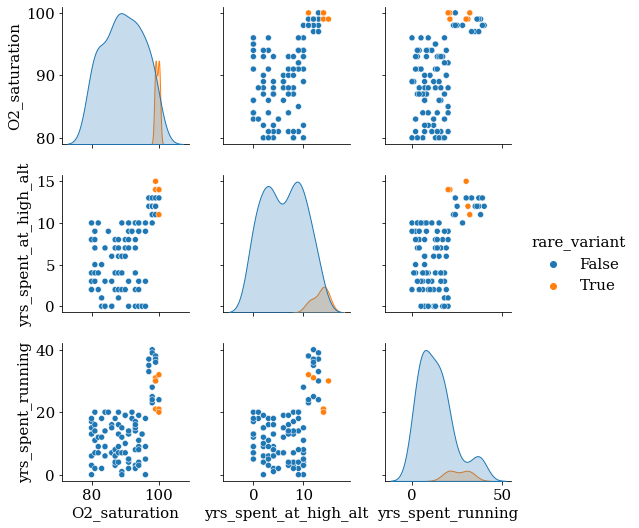

In [ ]:
sns.pairplot(oxygen_df , hue="rare_variant")

What do you notice from these plots? Which plots do you think are important? Which ones do you think are unimportant?

Do any of the features look correlated?

Plotting practice: violin and scatter plots
--
Let's look at the effect of whether the presence of the rare variant affects oxygen levels. To do this, we are going to use a violin plot and a strip plot. Compare these two and tell us what you think about them. What trends do you see between the variant and O2 content?

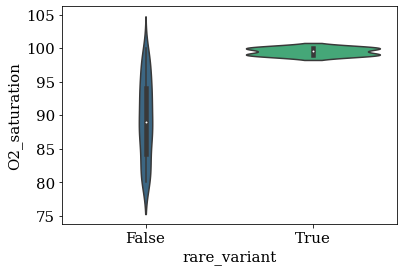

In [ ]:
sns.violinplot(data=oxygen_df, x='rare_variant', y='O2_saturation', palette='viridis')


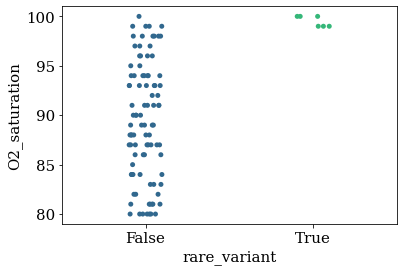

In [ ]:
sns.stripplot(data=oxygen_df, x='rare_variant', y='O2_saturation', palette='viridis')


What trends do you see? How do the two plots differ?

# Perform the regression using the following features:


Do to this, we use scipy stats. Scipy stats is a software package that performs statistical analysis in python.

We run the linear regression by putting a formula in to smf.ols(). OLS stands for ordinary least squares. 

We specify a .fit() at the end of the linear regression to tell the code to run a linear regression fit on the model

To see the fit results, we write print(fit_results.summary()) at the end of this fitted model.


This is the syntax for the fit:

smf.ols('outcome_variable ~ input_variable', data=df_being_tested  ).fit()

# single feature model

Run the model on a single feature. What are the results that you get

In [ ]:
linear_regression_single_feature = smf.ols('O2_saturation ~ yrs_spent_at_high_alt', data=oxygen_df  ).fit()

In [ ]:
print(linear_regression_single_feature.summary())


                            OLS Regression Results                            
Dep. Variable:          O2_saturation   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     40.23
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           6.97e-09
Time:                        16:19:16   Log-Likelihood:                -306.26
No. Observations:                 100   AIC:                             616.5
Df Residuals:                      98   BIC:                             621.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                85.00

Plot the feature vs the outcome in a scatter plot and plot the regression line over it.

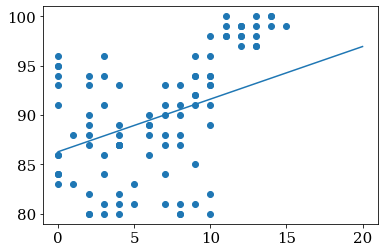

In [ ]:
plt.plot([0, 20], [86.2941+0.0, 86.2941+0.5320*20])

plt.scatter(oxygen_df.yrs_spent_at_high_alt, oxygen_df.O2_saturation)#

Run the single feature model, and make the single feature be the rare variant. Run the same model, but only using 20 samples ( write oxygen_df.sample(20)). What is the difference in accuracy between the two models?

Challenge:
--

Run all of the variables in the dataframe. Compare the coef of each feature. What do you notice?